In [2]:
# Import data set and create a data frames
import pandas as pd

columns = ['Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Location']
attributes = columns[0:7]
target = columns[7]

dataframe = pd.read_csv('wifi_localization.txt', delim_whitespace=True, header=None, usecols=[*range(0, 8)], names=columns)
data = pd.DataFrame.copy(dataframe)
data_scaled = pd.DataFrame.copy(dataframe)

# Normalize data in data_scaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
data_scaled[attributes] = scaler.fit_transform(data_scaled[attributes])
# Convert the array back to a dataframe
data_scaled = pd.DataFrame(data_scaled)

Orginal data:


Agent 1  Agent 2  Agent 3  Agent 4  Agent 5  Agent 6  Agent 7  Location
count   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0    2000.0
mean     -52.3    -55.6    -55.0    -53.6    -62.6    -81.0    -81.7       2.5
std       11.3      3.4      5.3     11.5      9.1      6.5      6.5       1.1
min      -74.0    -74.0    -73.0    -77.0    -89.0    -97.0    -98.0       1.0
25%      -61.0    -58.0    -58.0    -63.0    -69.0    -86.0    -87.0       1.8
50%      -55.0    -56.0    -55.0    -56.0    -64.0    -82.0    -83.0       2.5
75%      -46.0    -53.0    -51.0    -46.0    -56.0    -77.0    -78.0       3.2
max      -10.0    -45.0    -40.0    -11.0    -36.0    -61.0    -63.0       4.0

Scaled data:


Agent 1  Agent 2  Agent 3  Agent 4  Agent 5  Agent 6  Agent 7  Location
count   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0    2000.0
mean       0.3      0.6      0.5      0.4      0.5      0.4      0.5       2.5
std        0.2      0.1      0.2      0.2      0.2      0.2      0.2       1.1
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0       1.0
25%        0.2      0.6      0.5      0.2      0.4      0.3      0.3       1.8
50%        0.3      0.6      0.5      0.3      0.5      0.4      0.4       2.5
75%        0.4      0.7      0.7      0.5      0.6      0.6      0.6       3.2
max        1.0      1.0      1.0      1.0      1.0      1.0      1.0       4.0

Text(0.5, 1.02, 'Normalized data')

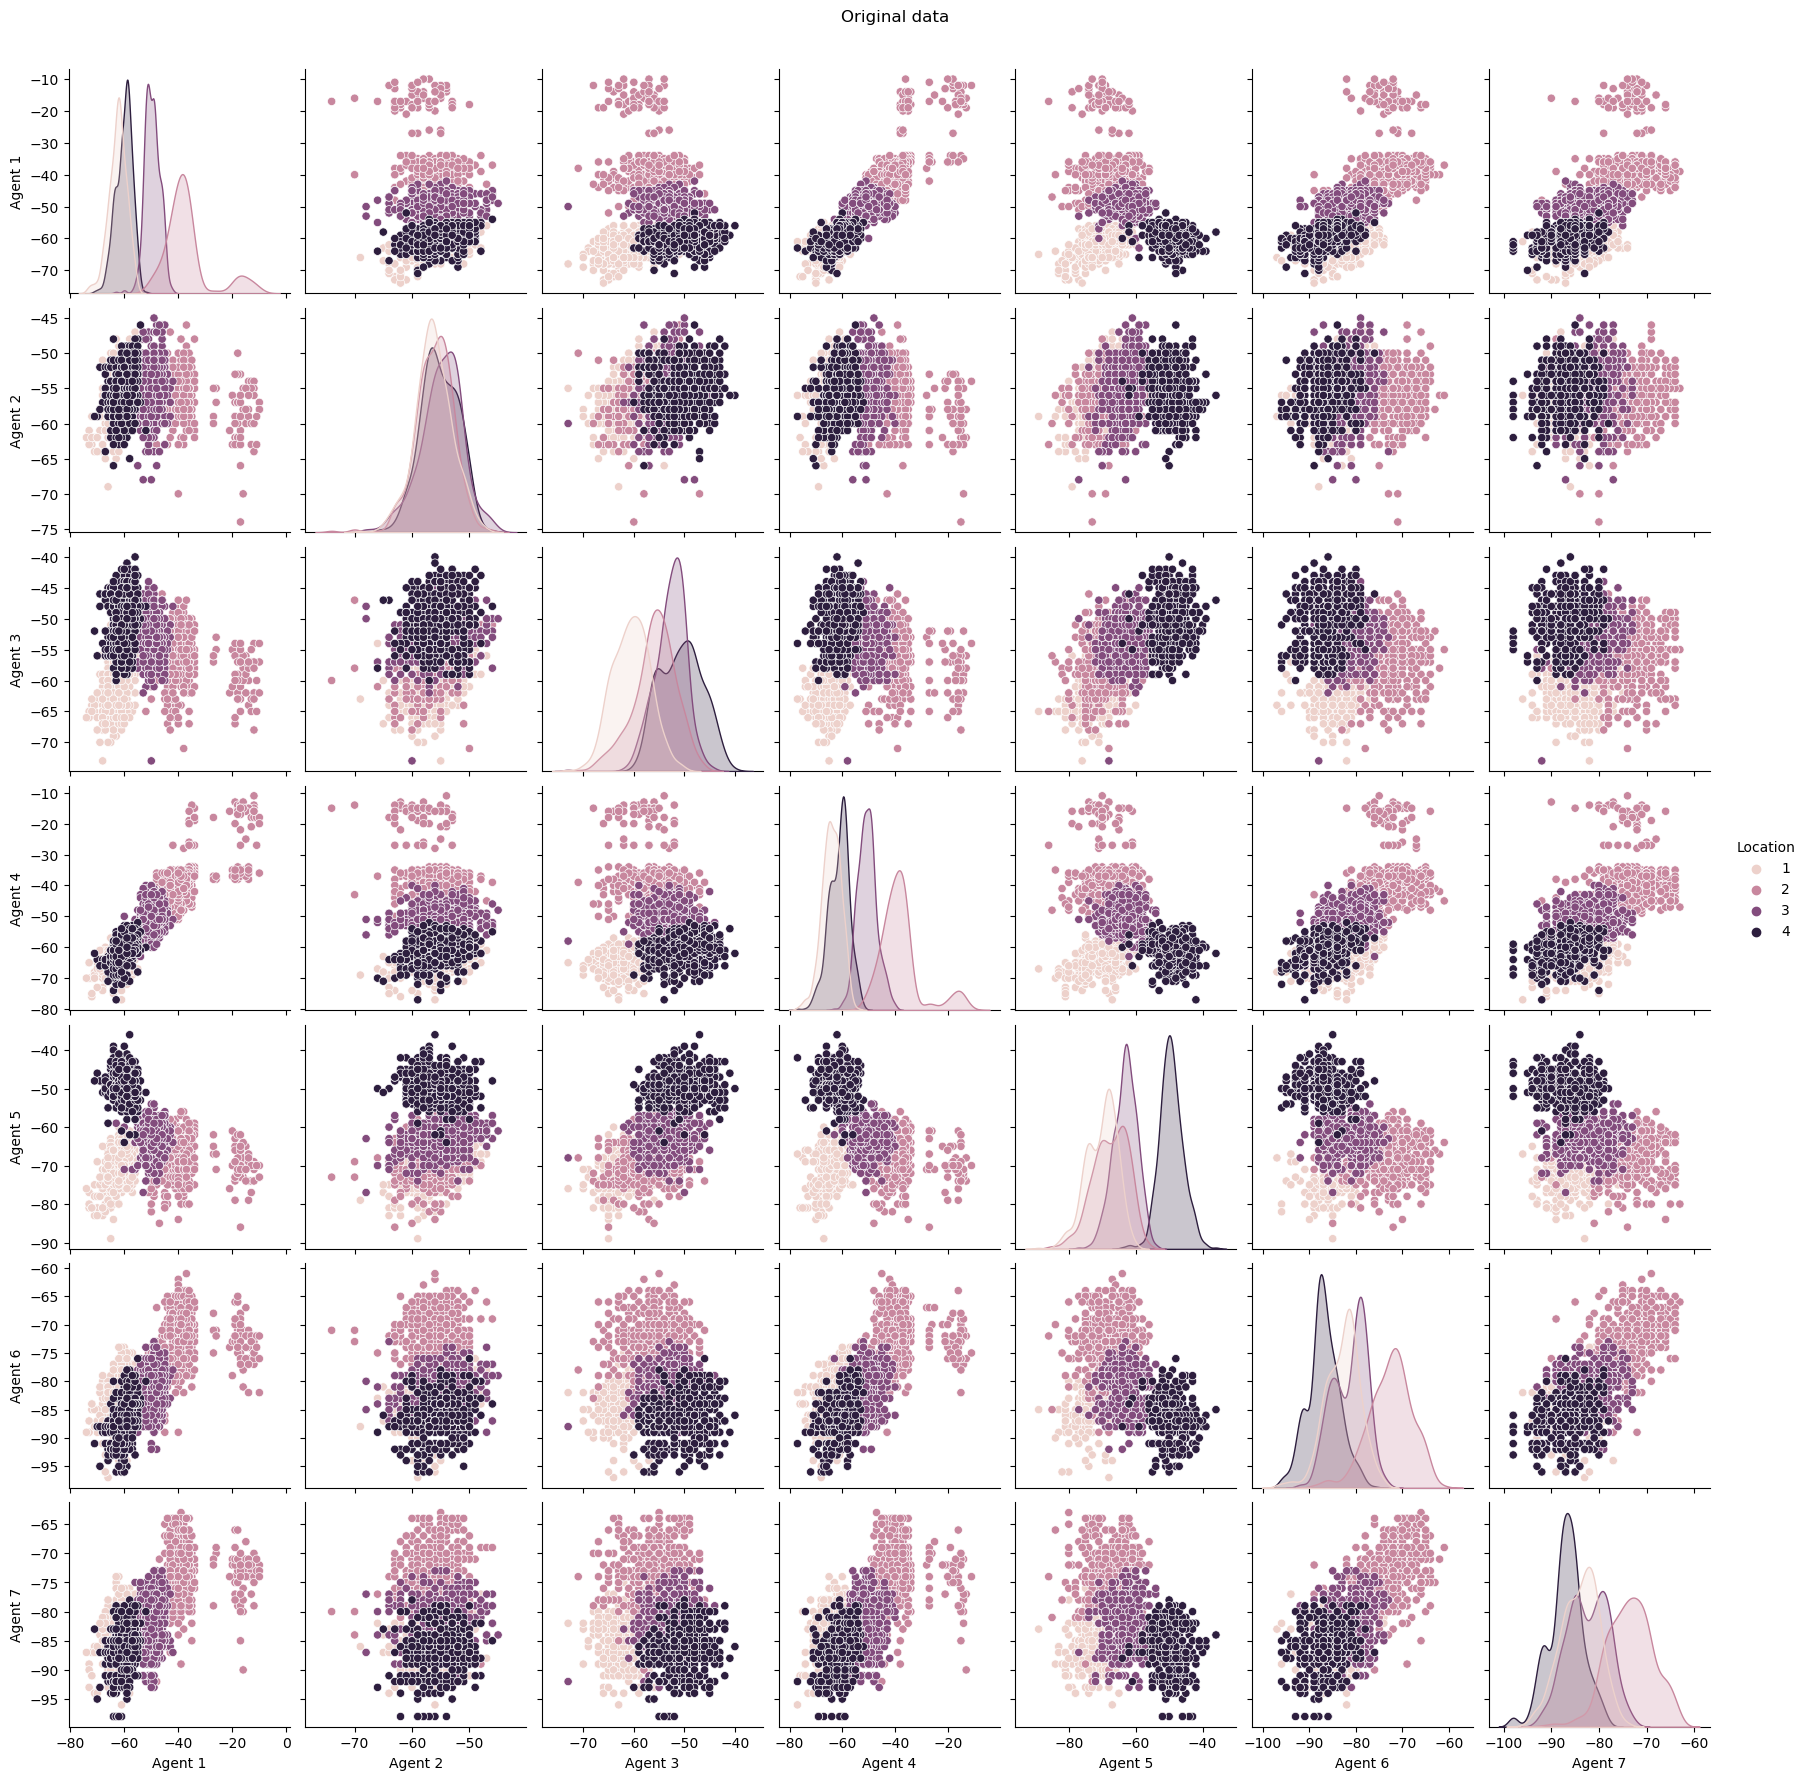

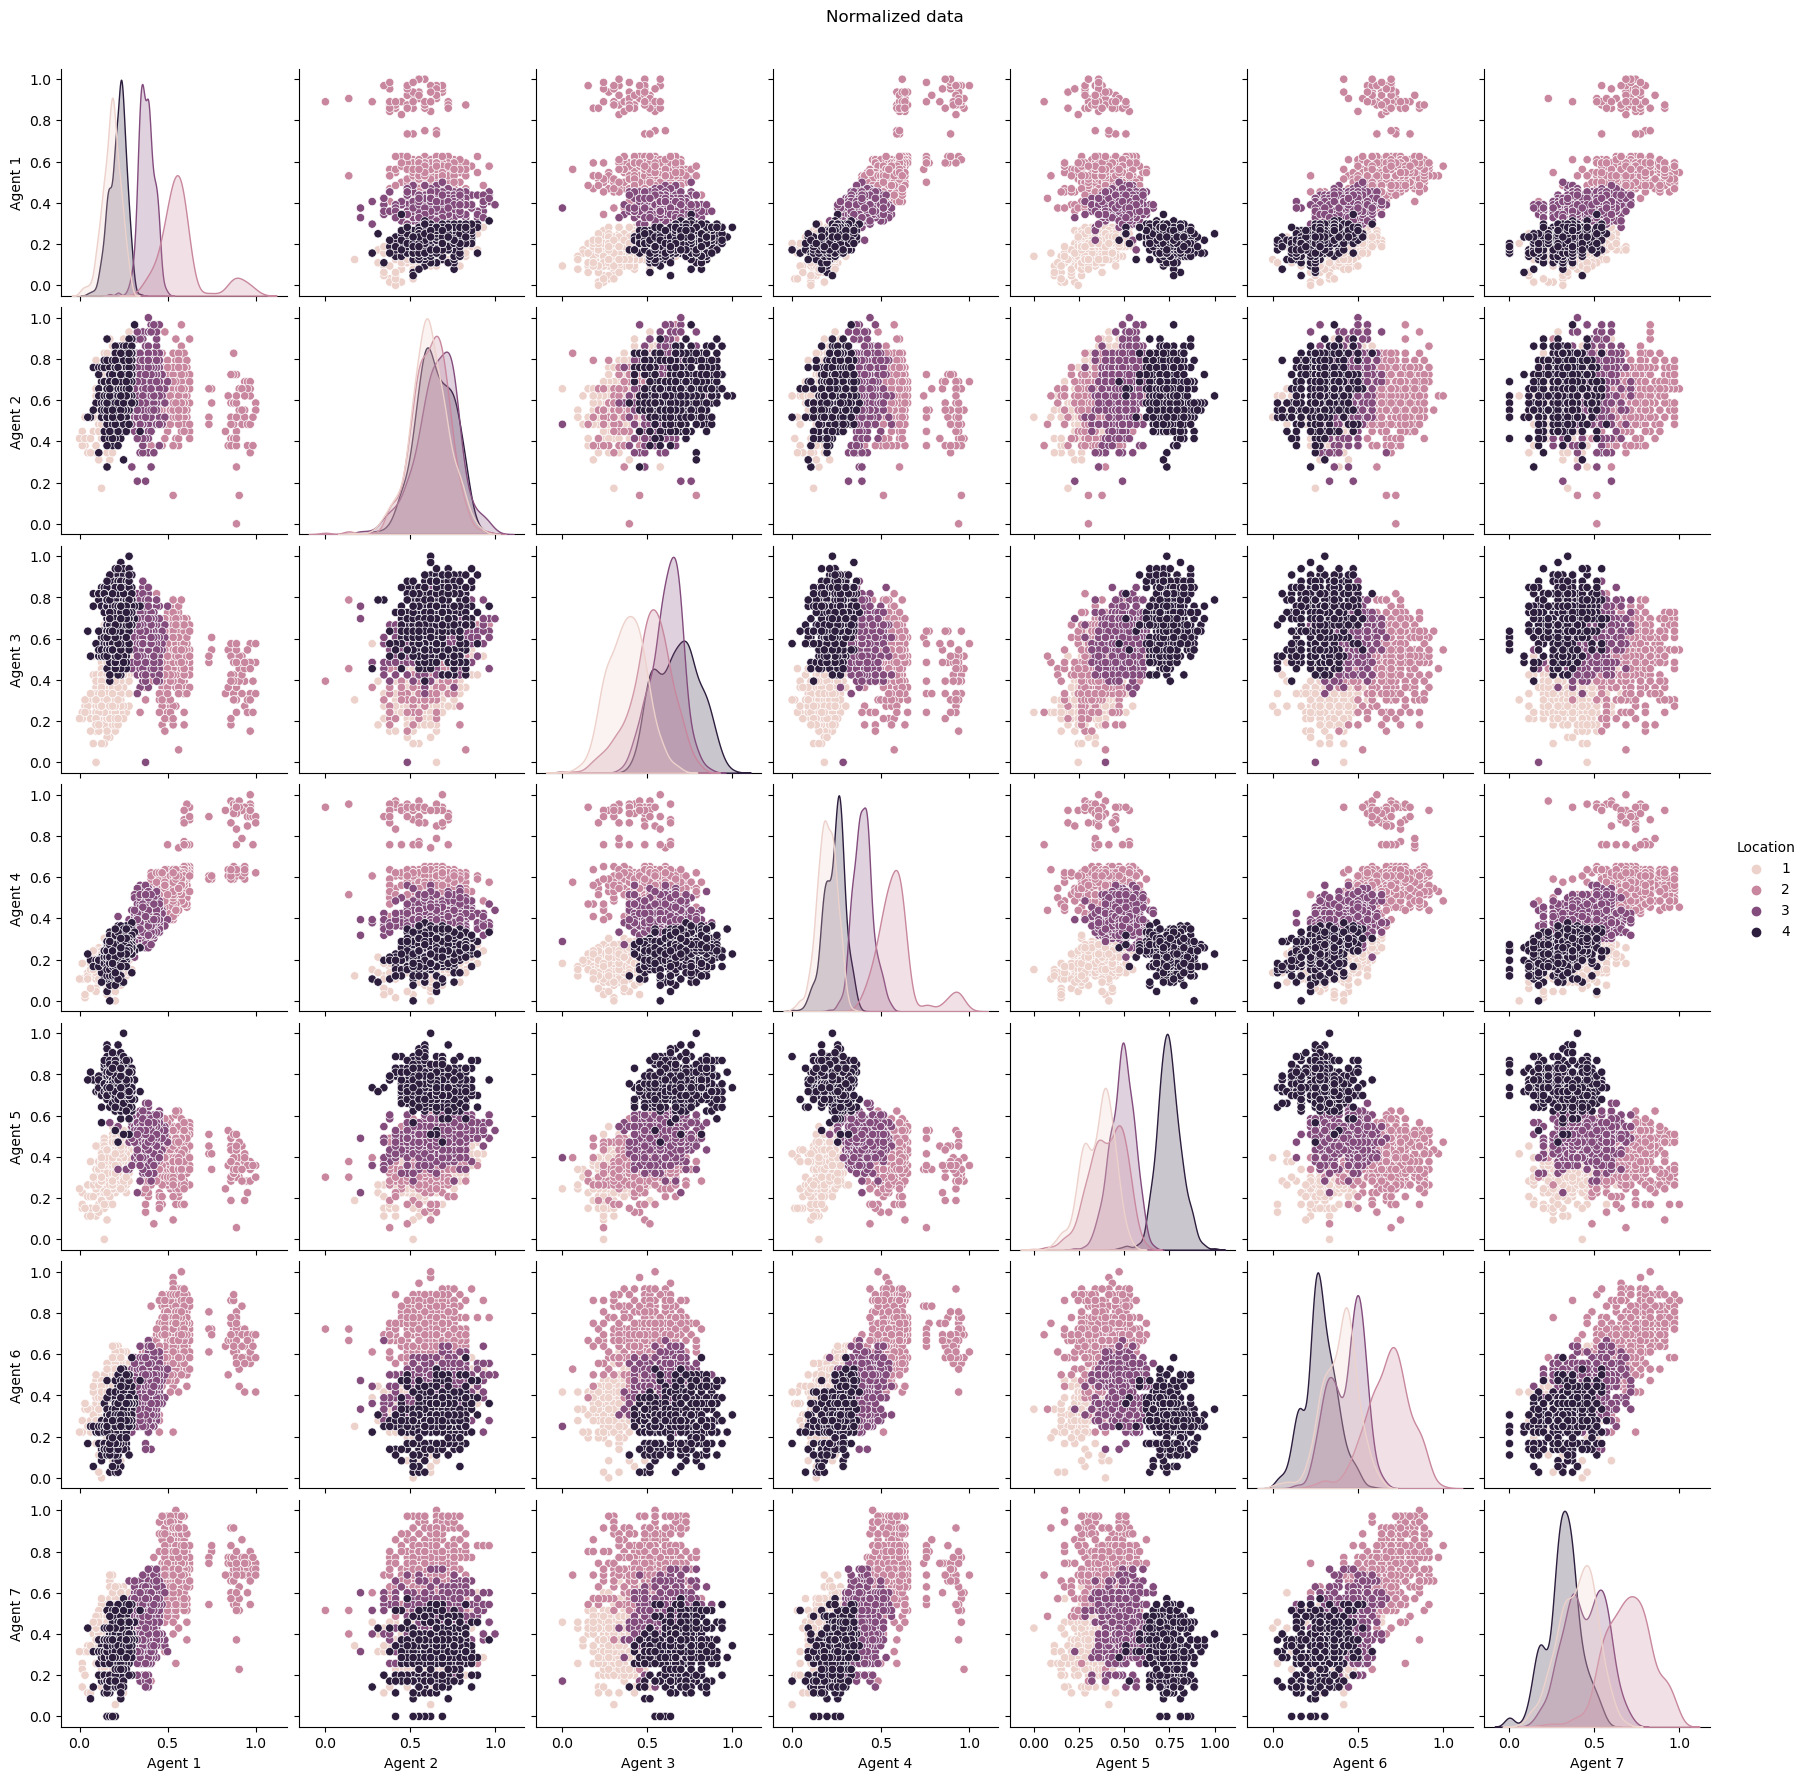

In [3]:
# Do some exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

print('Orginal data:')
display(round(data.describe(),1))

print('Scaled data:')
display(round(data_scaled.describe(),1))

ax1 = sns.pairplot(data, hue = target)
ax1.fig.suptitle("Original data", y=1.02)
ax2 = sns.pairplot(data_scaled, hue = target)
ax2.fig.suptitle("Normalized data", y=1.02)

## Run with original data

In [4]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x = data.drop(target, axis = 1)
y = data[target]

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

In [5]:
# Train the decision tree model and make predictions
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=None)
#model = DecisionTreeClassifier(random_state=1234)
model.fit(x_training_data, y_training_data)
# Predict the test set results
predictions = model.predict(x_test_data)
predictions

array([1, 3, 3, 1, 1, 1, 3, 1, 4, 2, 1, 3, 1, 1, 3, 2, 4, 3, 4, 4, 2, 2,
       1, 1, 3, 4, 2, 4, 1, 2, 1, 2, 2, 2, 4, 4, 4, 2, 1, 1, 2, 1, 4, 3,
       1, 1, 4, 2, 1, 3, 2, 1, 4, 1, 2, 3, 4, 1, 1, 2, 2, 2, 4, 1, 3, 3,
       1, 1, 4, 3, 2, 2, 2, 3, 3, 2, 1, 1, 3, 3, 3, 1, 2, 3, 2, 2, 1, 3,
       4, 4, 1, 4, 3, 4, 2, 4, 1, 1, 1, 2, 2, 3, 1, 4, 4, 2, 3, 1, 3, 1,
       4, 1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 2, 4, 1, 1, 3, 3, 1, 3, 1,
       4, 4, 2, 2, 4, 3, 3, 2, 1, 3, 4, 4, 2, 3, 2, 1, 1, 3, 2, 1, 4, 4,
       2, 1, 4, 4, 2, 4, 3, 2, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 3, 3, 1, 1,
       3, 1, 2, 4, 4, 3, 4, 2, 3, 1, 4, 3, 3, 4, 1, 3, 4, 2, 4, 3, 4, 4,
       4, 3, 4, 3, 3, 1, 3, 4, 4, 4, 2, 4, 2, 1, 3, 1, 4, 4, 1, 1, 1, 2,
       2, 4, 3, 2, 1, 3, 1, 1, 4, 4, 2, 3, 3, 2, 4, 2, 3, 1, 4, 3, 3, 4,
       3, 1, 2, 3, 3, 2, 1, 2, 3, 1, 1, 4, 4, 1, 3, 3, 1, 4, 2, 2, 3, 3,
       2, 1, 1, 4, 1, 1, 1, 3, 4, 4, 2, 3, 1, 2, 4, 4, 1, 1, 4, 3, 1, 1,
       3, 1, 4, 2, 4, 3, 1, 1, 3, 4, 3, 3, 4, 4, 3,

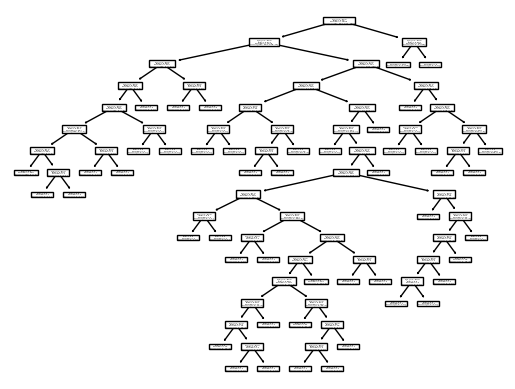


Classification report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       143
           2       0.97      0.97      0.97       118
           3       0.95      0.97      0.96       129
           4       0.99      0.98      0.99       110

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500


Confustion matrix:


Predicted    1    2    3    4
Actual                       
1          142    0    1    0
2            0  114    4    0
3            0    3  125    1
4            1    0    1  108

In [6]:
# Measure the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Generate a decision tree
tree.plot_tree(model)
plt.show()

# Print the classification report
print('\nClassification report:\n', classification_report(y_test_data, predictions))

classification_report(y_test_data,predictions)

# Print the Confusion matrix
print('\nConfustion matrix:')
#print('\nConfustion matrix:\n', confusion_matrix(y_test_data, predictions))
pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])

## Run with normalized data

In [7]:
# Split data into training and test sets
x = data_scaled.drop(target, axis = 1)
y = data_scaled[target]

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

In [8]:
# Train the decision tree model and make predictions
model = DecisionTreeClassifier(random_state=1234)
model.fit(x_training_data, y_training_data)
# Predict the test set results
predictions = model.predict(x_test_data)
predictions

array([4, 4, 1, 2, 1, 2, 2, 4, 3, 4, 2, 2, 3, 3, 2, 4, 1, 4, 1, 2, 3, 2,
       3, 3, 3, 2, 3, 4, 2, 4, 3, 4, 2, 1, 4, 3, 3, 3, 1, 3, 1, 4, 1, 3,
       3, 4, 1, 4, 3, 1, 2, 4, 2, 4, 4, 4, 2, 1, 2, 4, 2, 2, 4, 1, 3, 4,
       4, 2, 4, 3, 4, 3, 3, 3, 1, 3, 1, 2, 4, 4, 1, 3, 2, 3, 3, 3, 2, 3,
       4, 1, 1, 1, 4, 4, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 3,
       4, 1, 4, 3, 2, 1, 3, 1, 3, 3, 1, 3, 4, 1, 4, 4, 4, 1, 1, 2, 2, 4,
       4, 1, 1, 1, 3, 1, 1, 3, 3, 3, 2, 1, 1, 4, 4, 3, 1, 2, 4, 1, 2, 4,
       4, 3, 2, 4, 3, 3, 2, 1, 3, 1, 2, 1, 3, 3, 4, 4, 1, 4, 4, 1, 3, 4,
       3, 2, 1, 3, 4, 4, 1, 3, 2, 4, 2, 3, 3, 1, 2, 1, 1, 1, 2, 4, 3, 3,
       4, 1, 2, 4, 3, 2, 2, 1, 4, 2, 3, 4, 3, 1, 1, 1, 4, 4, 4, 3, 1, 2,
       3, 1, 2, 2, 2, 3, 4, 3, 3, 3, 4, 1, 3, 2, 3, 3, 4, 1, 4, 4, 1, 1,
       4, 4, 1, 3, 2, 1, 1, 4, 4, 1, 3, 1, 1, 2, 2, 4, 2, 1, 3, 3, 4, 3,
       4, 1, 4, 4, 1, 2, 4, 3, 4, 3, 2, 1, 4, 3, 1, 4, 3, 2, 1, 3, 3, 3,
       2, 4, 2, 2, 2, 3, 3, 2, 1, 4, 2, 1, 1, 4, 4,

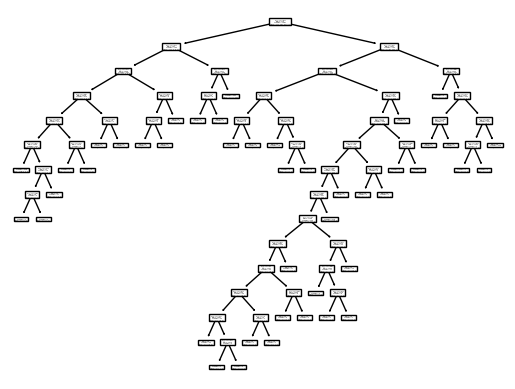


Classification report:
               precision    recall  f1-score   support

           1       0.96      0.99      0.98       128
           2       0.99      0.97      0.98       113
           3       0.96      0.97      0.97       130
           4       1.00      0.98      0.99       129

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500


Confustion matrix:


Predicted    1    2    3    4
Actual                       
1          127    0    1    0
2            0  110    3    0
3            3    1  126    0
4            2    0    1  126

In [9]:
# Generate a decision tree
tree.plot_tree(model)
plt.show()

# Print the classification report
print('\nClassification report:\n', classification_report(y_test_data, predictions))

classification_report(y_test_data,predictions)

# Print the Confusion matrix
print('\nConfustion matrix:')
#print('\nConfustion matrix:\n', confusion_matrix(y_test_data, predictions))
pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])

## 100 runs with normalized data and 75/25 split for training/test

In [87]:
# Create arrays to store the results
accuracy_log = [0.0]*100
confusion_matrix_log = [None]*100


for i in range(100):
    model = DecisionTreeClassifier(random_state=None)

    x = data_scaled.drop(target, axis = 1)
    y = data_scaled[target]
    x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

    model.fit(x_training_data, y_training_data)
    predictions = model.predict(x_test_data)
    
    # Read the classification report
    report = classification_report(y_test_data, predictions, output_dict=True, digits=6)
    # Save the accuracy
    accuracy_log.insert(i, report['accuracy'])
    # Save the confusion matrix
    confusion_matrix_log.insert(i, confusion_matrix(y_test_data, predictions))


# Get index of the highest accuracy
max_accuracy_index = accuracy_log.index(max(accuracy_log))
print('Max accuracy:', accuracy_log[max_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[max_accuracy_index])

Max accuracy: 0.988 

Confusion matrix:
 [[137   0   0   0]
 [  0 122   3   0]
 [  0   1 124   1]
 [  1   0   0 111]]
